In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [5]:
df = pd.read_csv("datasets/bank.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [7]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
curtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


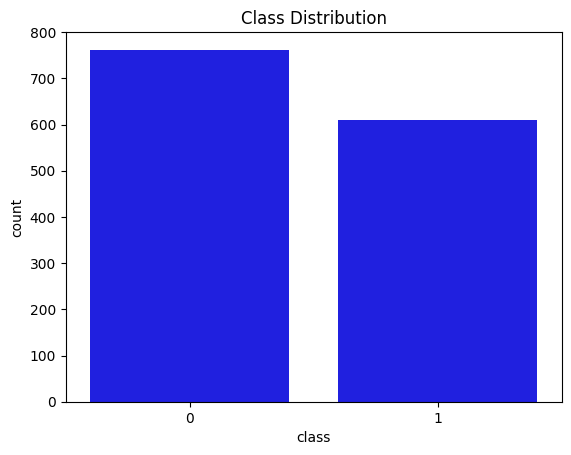

In [9]:
sns.countplot(x='class', data=df, color="b")
plt.title('Class Distribution')
plt.show()

In [10]:
print(f"Before: {df.shape[0]}")

z = zscore(df[["skewness", "variance", "curtosis", "entropy"]])
df = df[(np.abs(z) <= 3).all(axis=1)]

print(f"After: {df.shape[0]}")

Before: 1372
After: 1336


In [11]:
x_train, x_test, y_train, y_test = train_test_split(
    df[["skewness", "variance", "curtosis", "entropy"]], 
    df["class"], 
    random_state=1, 
    test_size=0.2, 
    train_size=0.8
    )

In [12]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [13]:
knn = KNeighborsClassifier()

In [14]:
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean']
}

grid = GridSearchCV(knn, param_grid, cv=5, scoring="accuracy")
grid.fit(x_train, y_train)

print("Best parameters:", grid.best_params_)

best_model = grid.best_estimator_
y_pred = best_model.predict(x_test)

print(classification_report(y_test, y_pred))

Best parameters: {'metric': 'minkowski', 'n_neighbors': 14, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       161
           1       1.00      1.00      1.00       107

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



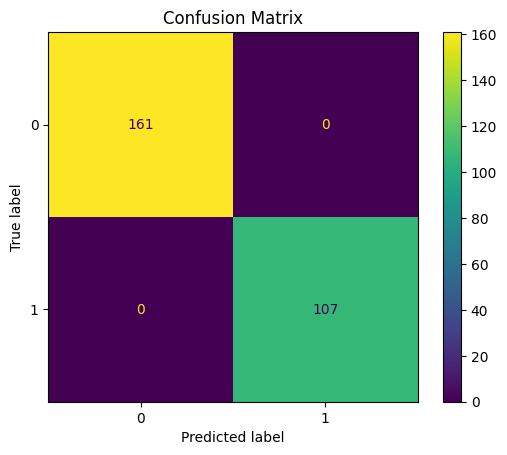

In [15]:
ConfusionMatrixDisplay.from_estimator(best_model, x_test, y_test)
plt.title('Confusion Matrix')
plt.show()

In [16]:
train_accuracy = best_model.score(x_train, y_train)
test_accuracy = best_model.score(x_test, y_test)

print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

Train accuracy: 1.0000
Test accuracy: 1.0000
